# Support Vector Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/PositionSalaries_Data.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
y = np.array(y).reshape(-1,1)

dataset.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


## Training the Support Vector Regression model on the Training set

In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting the Results

In [5]:
y_pred = regressor.predict(X)
y_pred = sc_y.inverse_transform(y_pred)
y_pred

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

## Comparing the Real Values with Predicted Values

In [6]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,45000.0,73474.156157
1,50000.0,70786.945846
2,60000.0,88213.009021
3,80000.0,108254.985750
4,110000.0,122574.522506
5,150000.0,145503.106886
6,200000.0,209410.231329
7,300000.0,330606.892046
8,500000.0,471671.955873
9,1000000.0,557821.758999


## Visualising the SVR Results

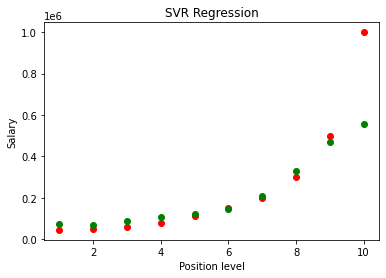

In [7]:
# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y.reshape(-1)), color = 'red')
plt.scatter(sc_X.inverse_transform(X), y_pred, color = 'green')
plt.title('SVR Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()